In [ ]:
# Bibliotecas principais
import numpy as np
import matplotlib.pyplot as plt

# Dataset e ferramentas da Keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
# Carregar o MNIST (60.000 treino, 10.000 teste)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalização: de [0,255] para [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding dos rótulos (10 classes: 0 a 9)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


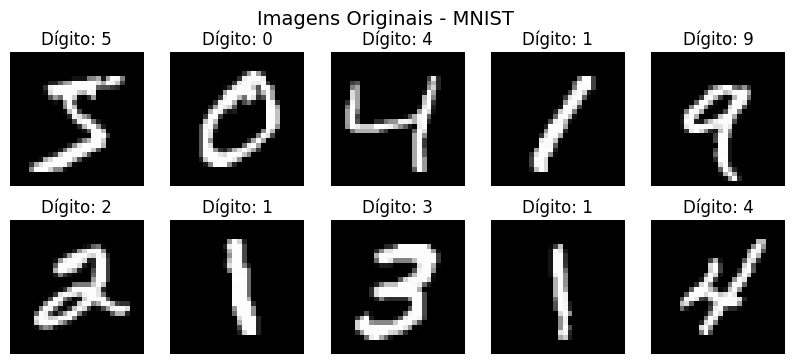

In [ ]:
# Visualizar 10 exemplos do conjunto de treino
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Dígito: {y_train[i]}')
    plt.axis('off')
plt.suptitle("Imagens Originais - MNIST", fontsize=14)
plt.show()

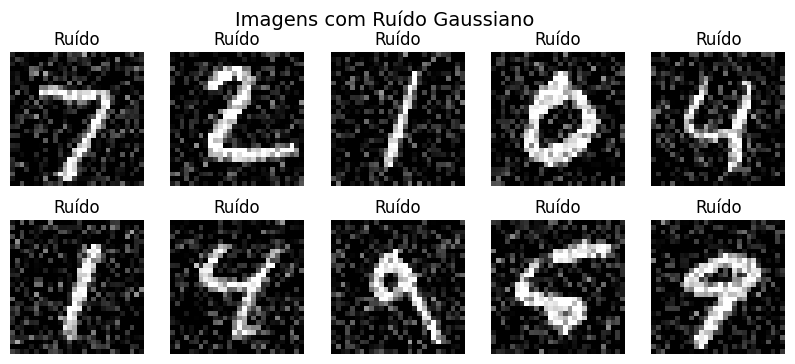

In [ ]:
# Função para adicionar ruído gaussiano
def add_gaussian_noise(images, noise_factor=0.2):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0., 1.)

# Aplicando ruído apenas no conjunto de teste
x_test_noisy = add_gaussian_noise(x_test)

# Visualizar imagens ruidosas
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test_noisy[i], cmap='gray')
    plt.title(f'Ruído')
    plt.axis('off')
plt.suptitle("Imagens com Ruído Gaussiano", fontsize=14)
plt.show()

In [ ]:
# Função para criar um modelo MLP com número variável de neurônios
def build_mlp(num_neurons=1024):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(num_neurons, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Treinar com 1024 neurônios (exemplo)
model = build_mlp(num_neurons=1024)

history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2)

Epoch 1/10
750/750 - 14s - 18ms/step - accuracy: 0.9328 - loss: 0.2286 - val_accuracy: 0.9652 - val_loss: 0.1180
Epoch 2/10
750/750 - 20s - 27ms/step - accuracy: 0.9739 - loss: 0.0872 - val_accuracy: 0.9707 - val_loss: 0.0894
Epoch 3/10
750/750 - 21s - 28ms/step - accuracy: 0.9843 - loss: 0.0536 - val_accuracy: 0.9758 - val_loss: 0.0795
Epoch 4/10
750/750 - 12s - 17ms/step - accuracy: 0.9884 - loss: 0.0367 - val_accuracy: 0.9739 - val_loss: 0.0891
Epoch 5/10
750/750 - 20s - 27ms/step - accuracy: 0.9914 - loss: 0.0275 - val_accuracy: 0.9783 - val_loss: 0.0834
Epoch 6/10
750/750 - 21s - 28ms/step - accuracy: 0.9944 - loss: 0.0184 - val_accuracy: 0.9795 - val_loss: 0.0757
Epoch 7/10
750/750 - 12s - 16ms/step - accuracy: 0.9946 - loss: 0.0168 - val_accuracy: 0.9779 - val_loss: 0.0859
Epoch 8/10
750/750 - 12s - 16ms/step - accuracy: 0.9958 - loss: 0.0131 - val_accuracy: 0.9767 - val_loss: 0.0941
Epoch 9/10
750/750 - 20s - 26ms/step - accuracy: 0.9966 - loss: 0.0110 - val_accuracy: 0.9801 - 

In [ ]:
# Avaliação no conjunto de teste original
loss_clean, acc_clean = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Acurácia com dados limpos: {acc_clean:.4f}")

# Avaliação no conjunto de teste com ruído
loss_noisy, acc_noisy = model.evaluate(x_test_noisy, y_test_cat, verbose=0)
print(f"Acurácia com dados ruidosos: {acc_noisy:.4f}")

Acurácia com dados limpos: 0.9786
Acurácia com dados ruidosos: 0.8851


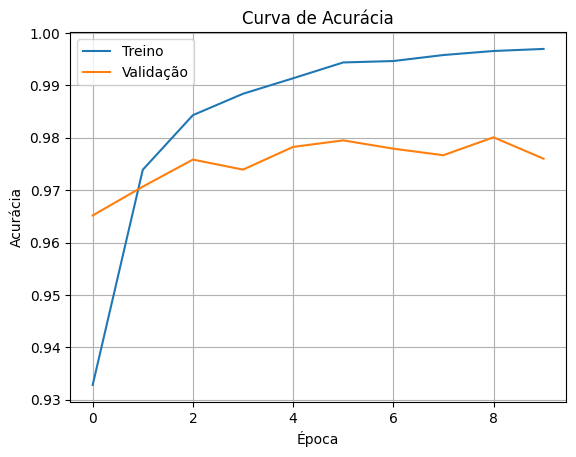

In [ ]:
# Curva de acurácia
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Curva de Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


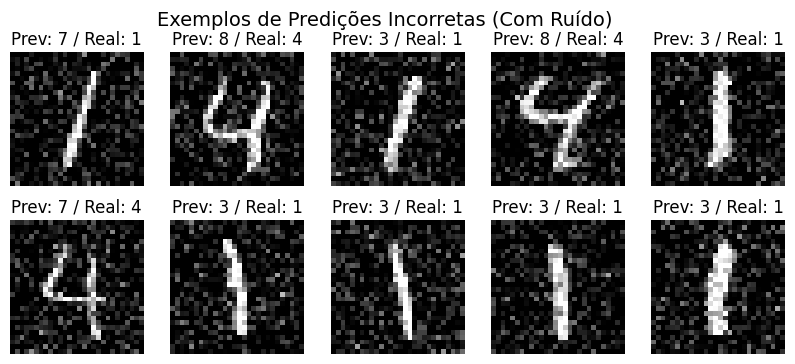

In [ ]:
# Predições erradas no conjunto ruidoso
predictions = model.predict(x_test_noisy)
wrong = np.where(np.argmax(predictions, axis=1) != y_test)[0]

plt.figure(figsize=(10, 4))
for i, idx in enumerate(wrong[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test_noisy[idx], cmap='gray')
    plt.title(f"Prev: {np.argmax(predictions[idx])} / Real: {y_test[idx]}")
    plt.axis('off')
plt.suptitle("Exemplos de Predições Incorretas (Com Ruído)", fontsize=14)
plt.show()